# APODE

Este documento muestra la funcionalidad actual del paquete apode. El mismo provee una clase que hereda (pendiente) de la clase DataFrame.

Esta clase dispone de varios métodos que calculan medidas y generan gráficos en los siguuinetes temas:

* Pobreza
* Desigualdad
* Bienestar
* Polarización
* Concentración

Otros temas serán agregados más adelante.

Al momento los algoritmos no han sido testeados y es escasa la documentación. 

# Clase IneqMeasure

Los objetos se crean mediante:

    df = IneqMeasure(data, varx=None, weight=None, issorted=False):
    
Métodos para acceder/modificar atributos:

    df.data
    df.varx
    df.weight
    df.issorted
    df.sort()
    
Métodos sobre el dataframe:

    df.describe()
    df.columns()
    df.ndim()
    df.shape()
    df.size()
    df.display()

Metodos que calculan indicadores:
   
    df.poverty(method,*args)    
    df.ineq(method,*args)
    df.welfare(method,*args) 
    df.polar(method,*args)
    df.conc(method,*args)
 
Métodos que computan gráficos:

    df.tip(*args,**kwargs)
    df.lorenz(*args,**kwargs)
    df.pen(*args,**kwargs)
    
    

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from apode import IneqMeasure # clase
from apode import distribution_examples,default_rng,test_measures # test  

# Data Creation and Description

* Los datos pueden generarse manualmente o mediante simuación. Estan contenidos en un DataFrame
* Los datos pueden estar agrupados. En este caso una variable contiene las frecuencias.
* Pueden existir otras variables categóricas que permiten aplicar los indicadores por grupos (groupby)
* Un parámetros indica si los datos están ordenados (por defecto no)

    

## Carga manual

Se puede crear objeto desde un DataFrame o desde un argumento válido de la funcion DataFrame. La función *binning* se puede usar para agrupar datos.

In [2]:
# dr1a y dr1b son equivalentes
x = [23, 10, 12, 21, 4, 8, 19, 15, 11, 9]
dr1a = IneqMeasure(x) 

df1 = pd.DataFrame({'x':x})
dr1b = IneqMeasure(df1) 

dr1b.display()

,x
0,23
1,10
2,12
3,21
4,4
5,8
6,19
7,15
8,11
9,9


## Lectura desde la web

Usar LIS Database https://www.lisdatacenter.org/our-data/lis-database/
The Luxembourg Income Study Database (LIS) is the largest available income database of harmonised microdata collected from about 50 countries in Europe, North America, Latin America, Africa, Asia, and Australasia spanning five decades.


## Simulación 

La función *distribution_examples* brinda algunos ejemplos de distribuciones usuales para modelar la distribución del ingreso.

Se generan dos objetos (datos agrupados y no agrupados) que serán utilizados más adelante para mostrar la aplicación de diferentes medidas (muchos de las medidas aún no estan implementadas para datos agrupados).

### Datos no agregados

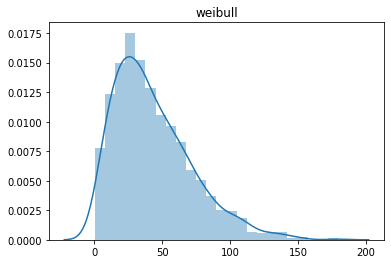

In [3]:
# Generar datos
n = 1000 # observaciones
j_d = 6  # elegir distribción
rg = default_rng(12345)
listd = ['uniform','lognormal','exponential','pareto','chisquare','gamma','weibull']
fdistr = listd[j_d]
df2 = distribution_examples(rg,fdistr,n)

# Crear objeto (sin agrupamiento)
dr2 = IneqMeasure(df2) 

# Graficar distribución
sns.distplot(df2).set_title(fdistr)
plt.show()

### Datos agregados

In [4]:
# Generar datos con agrupamiento
nbins = 10 # maximo, se descartan NAN
df3 = distribution_examples(rg,fdistr,n,nbins)

# Crear objeto
dr3 = IneqMeasure(df3,varx = 'x',weight='weight')  

dr3.display()

,weight,x
0,190,10.798911
1,272,27.669447
2,213,44.890412
3,151,63.162394
4,77,81.015122
5,55,98.624920
6,22,119.392807
7,10,132.721464
8,5,148.602313
9,5,175.699644


La variable x y el ponderador se pueden modificar luego de crear el objeto (mientras estén presentes en el dataframe)

## Describe

El método **describe** extiende la función describe de DataFrame, para incluir parámetros y tratar el caso de datos agrupados

In [5]:
dr1b.describe()

,x
weight,False
bins,10
sorted,False
count,10
mean,13.2
std,6.14275
min,4
25%,9.25
50%,11.5
75%,18


In [7]:
dr3.describe()

,x
weight,True
bins,10
sorted,False
count,1000
mean,45.915
min,10.7989
max,175.7


Otros métodos:

In [8]:
dr3.columns()

['weight', 'x']

In [9]:
dr3.shape(),dr3.ndim(),dr3.size()  # requieren parentesis en la invocacion

((10, 2), 2, 20)

# Measures

## Poverty

EStán implementados 11 medidas de pobreza y la curva TIP (permite comparar gráficamente la pobreza entre distribuciones)

### Numerical measures

In [6]:
pline = 50 # Poverty line
# Evaluar un método - datos sin agrupar
p = dr2.poverty('fgt0',pline)
p

0.656

In [7]:
# Evaluar un método - datos agrupados
p = dr3.poverty('fgt0',pline)
p

0.675

In [8]:
# Evaluar un listado de métodos
dfl_p = test_measures(dr2,'poverty')
dfl_p

,method,pline,par,poverty_measure
0,fgt0,50,NaN,0.656000
1,fgt1,50,NaN,0.312483
2,fgt2,50,NaN,0.192512
3,fgt,50,1.5,0.240514
4,sen,50,NaN,0.408955
5,sst,50,NaN,0.262557
6,watts,50,NaN,0.549612
7,cuh,50,0.0,0.426800
8,cuh,50,0.5,0.359553
9,takayama,50,NaN,0.247400


### Graph measures

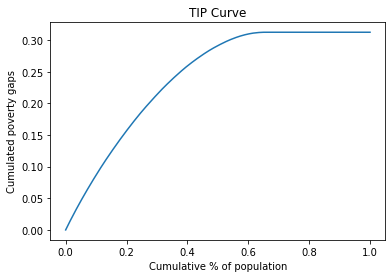

In [9]:
# Curva TIP
# dr2.tip(pline,plot=True)
df_tip = dr2.tip(pline)

## Inequality

Están implementadas 12 medidas de desigualdad y la Curva de Lorenz relativa, gemeralizada y absoluta (permite comparar gráficamente la desigualdad entre distribuciones)

### Numerical measures

In [14]:
# Evaluar un método - datos sin agrupar
q = dr2.ineq('gini')
q

0.36243669262961725

In [15]:
# Evaluar un método - datos agrupados
q = dr3.ineq('rr')
q

3.591437752558451

In [16]:
# Evaluar un listado de métodos
dfl_i = test_measures(dr2,'ineq')
dfl_i

,method,par,ineq_measure
0,rr,NaN,4.154631
1,dmr,NaN,0.264170
2,cv,NaN,0.666949
3,dslog,NaN,0.887906
4,gini,NaN,0.362437
5,merhan,NaN,0.509579
6,piesch,NaN,0.288869
7,bonferroni,NaN,0.507513
8,kolm,0.50,34.194790
9,ratio,0.05,0.034212


### Graph measures

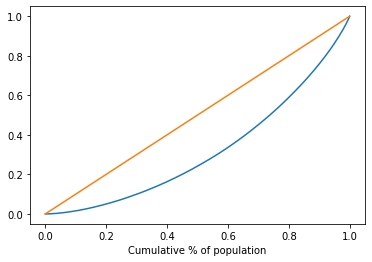

In [17]:
# Curva de Lorenz
# dr2.lorenz(type='r',plot=True), 
df_lor = dr2.lorenz()  # type = 'r'

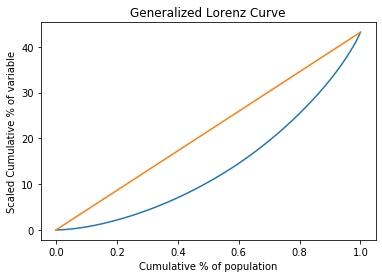

In [18]:
# Curva de Lorenz Generalizada
df_lorg = dr2.lorenz(type='g')

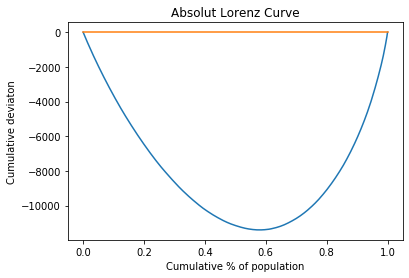

In [19]:
# Curva de Lorenz Absoluta
df_lora = dr2.lorenz(type='a')

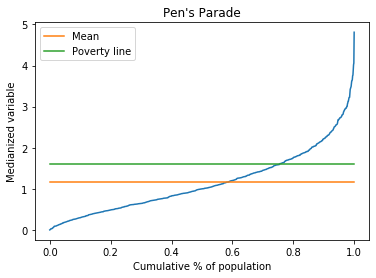

In [20]:
# Pen's Parade
# dr2.pen(pline=None,plot=True)
df_pen = dr2.pen(pline=60)

## Welfare

Están implementadas 5 funciones de bienestar social.

In [21]:
# Evaluar un método - datos sin agrupar
w = dr2.welfare('sen')
w

27.52092818253392

In [22]:
# Evaluar un método - datos agrupados
w = dr3.welfare('utilitarian')
w

45.91496318162924

In [23]:
# Evaluar un listado de métodos
dfl_w = test_measures(dr2,'welfare')
dfl_w

,method,par,welfare_measure
0,utilitarian,NaN,43.165526
1,rawlsian,NaN,0.308786
2,sen,NaN,27.520928
3,theill,NaN,32.835971
4,theilt,NaN,34.769813
5,isoelastic,0.0,43.165526
6,isoelastic,1.0,3.491525
7,isoelastic,2.0,-0.053750
8,isoelastic,inf,0.308786


## Polarization 

Están implementados 2 medidas de polarización.

In [24]:
# Evaluar un método - datos sin agrupar
p = dr2.polar('er')
p

0.031461857737321096

In [25]:
# Evaluar un listado de métodos
dfl_pz = test_measures(dr2,'polar')
dfl_pz

,method,polarization_measure
0,er,0.031462
1,wlf,-0.120901


## Concentration

Están implementadas 4 medidas de concentración (de uso comun para analizar la concentración industrial).

In [26]:
# Evaluar un método - datos sin agrupar
c = dr2.conc('hhi')
c

0.0014448204412599976

In [27]:
# Evaluar un listado de métodos
dfl_c = test_measures(dr2,'conc')
dfl_c

,method,par,concentration_measure
0,hhi,NaN,0.001445
1,hhin,NaN,0.000445
2,rosenbluth,NaN,0.001568
3,cr,1.0,0.004162
4,cr,5.0,0.017772


# Tools

## Decomposition

Los medidas pueden aplicarse por subrgrupos de acuerdo a cierta categoría. Por ejemplo:

In [28]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 5, 7]
y = [10,10,20,10,10,20,20,20,10,10] 
w = np.arange(1,11)
dfa = pd.DataFrame({'x':x,'y':y,'w':w})
dra = IneqMeasure(dfa,varx='x',weight='w')  
dra.display()

,x,y,w
0,23,10,1
1,10,10,2
2,12,20,3
3,21,10,4
4,4,10,5
5,8,20,6
6,19,20,7
7,15,20,8
8,5,10,9
9,7,10,10


In [29]:
# calculo simple
pline = 11
p1 = dra.poverty('fgt0',pline)
p1

0.5818181818181818

In [30]:
# calculo por grupos según variable "y"
p2 = dra.poverty('fgt0',pline,gby='y')
p2

,x_measure,x_weight
10,0.83871,31
20,0.25000,24


In [30]:
# Si el indicador es descomponible se obtiene el mismo resultado:
p2_p = sum(p2['x_measure']*p2['x_weight']/sum(p2['x_weight']))
p2_p

0.5818181818181818

## Comparative statics

Comparación de las medidas  en dos monetos de tiempo. 

Matrices de transición.

## Estimation

Se puede estimar:

* Intervalos de confianza de los indicadores usando bootstrap 
* Distribuciones paramétricas de los datos (algunas permiten calcular indirectamente las medidas, Pareto y Gini, por ej)

# Todo

**En algoritmos falta (implementación):**

* Tamaño nulo del dataframe
* Division por cero (/log(1))
* overflow
* Tratamiento de missings
* implementación eficiente (algunos son lentos: polarizacion)
* mejorar algunos nombres
* Hay metodos que tienen varios nombres o que pueden estar en diferentes categorías. Ver si agregar redundancia.
* Curva de lorenz generalizada


**En test:**

* Comparar resultados con librerias de R (y Stata)

# Other packages

Paquetes relacionados.

**Python**

- http://www.poorcity.richcity.org/oei/  (algoritmos)
- https://github.com/mmngreco/IneqPy
- https://pythonhosted.org/IneqPy/ineqpy.html
- https://github.com/open-risk/concentrationMetrics
- https://github.com/cjohnst5/GBdistributiontree

**R**

- https://cran.r-project.org/web/packages/ineq/ineq.pdf
- https://cran.r-project.org/web/packages/affluenceIndex/affluenceIndex.pdf
- https://cran.r-project.org/web/packages/dineq/dineq.pdf
- https://github.com/PABalland/EconGeo
- https://cran.r-project.org/web/packages/rtip/rtip.pdf
- https://cran.r-project.org/web/packages/GB2/index.html

**Stata**

- https://www.stata.com/manuals/rinequality.pdf
- http://dasp.ecn.ulaval.ca/dmodules/madds20.htm


# References

* Cowell, F. (2011) Measuring Inequality. London School of Economics Perspectives in Economic Analysis. 3rd ed. Edición. Oxford University Press
http://darp.lse.ac.uk/papersDB/Cowell_measuringinequality3.pdf
* Cowell, F. (2016) “Inequality and Poverty Measures”, in Oxford Handbook of Well-Being And Public Policy, edited by Matthew D. Adler and Marc Fleurbaey 
* Haughton, J. and S. Khandker (2009). Handbook on Poverty + Inequality. World Bank Training Series. https://openknowledge.worldbank.org/bitstream/handle/10986/11985/9780821376133.pdf
* POBREZA Y DESIGUALDAD EN AMÉRICA LATINA. https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/Pobreza_desigualdad_-America_Latina.pdf
* https://www.cepal.org/es/publicaciones/4740-enfoques-la-medicion-la-pobreza-breve-revision-la-literatura
* https://www.cepal.org/es/publicaciones/4788-consideraciones-indice-gini-medir-la-concentracion-ingreso


